In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential

In [2]:
#data_dir = './data/'
#train_path = './data/Train/'
#test_path = './data/'

data_dir = './GTSRB/'
train_path = "./GTSRB/Train"
test_path = "./GTSRB/Test"

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + 'Train/' + str(i)
    images = os.listdir(path)

    for j in images:
    
        image = Image.open(path + '/' + j)
        #print(image)
        image = image.resize((IMG_HEIGHT,IMG_WIDTH))
        image = np.array(image)
        #sim = Image.fromarray(image)
        image_data.append(image)
        image_labels.append(i)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [7]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(31367, 43)
(7842, 43)


In [8]:
# LeNet

model = Sequential()

# 1st conv
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape = (IMG_HEIGHT,IMG_WIDTH, channels)))
model.add(MaxPool2D((2, 2)))

# 2nd conv
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

# Flatten layer
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               138360    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7

In [9]:
lr = 0.001
epochs = 15

opt = Adam(lr=lr)  # , decay=lr / (epochs * 0.5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

lenet = model.fit(aug.flow(X_train, y_train,batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
981/981 [==============================] - 11s 9ms/step - loss: 3.0602 - accuracy: 0.1708 - val_loss: 1.5143 - val_accuracy: 0.5099
Epoch 2/15
981/981 [==============================] - 8s 8ms/step - loss: 1.7210 - accuracy: 0.4411 - val_loss: 0.9981 - val_accuracy: 0.6743
Epoch 3/15
981/981 [==============================] - 8s 8ms/step - loss: 1.2998 - accuracy: 0.5598 - val_loss: 0.6583 - val_accuracy: 0.7914
Epoch 4/15
981/981 [==============================] - 8s 8ms/step - loss: 1.0353 - accuracy: 0.6526 - val_loss: 0.4524 - val_accuracy: 0.8518
Epoch 5/15
981/981 [==============================] - 8s 8ms/step - loss: 0.8402 - accuracy: 0.7173 - val_loss: 0.3327 - val_accuracy: 0.8912
Epoch 6/15
981/981 [==============================] - 8s 8ms/step - loss: 0.7228 - accuracy: 0.7555 - val_loss: 0.3041 - val_accuracy: 0.8975
Epoch 7/15
981/981 [==============================] - 8s 8ms/step - loss: 0.6300 - accuracy: 0.7902 - val_loss: 0.1969 - val_accuracy: 0.9402
Epoch

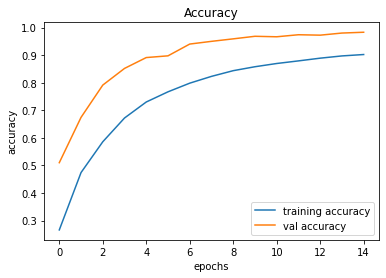

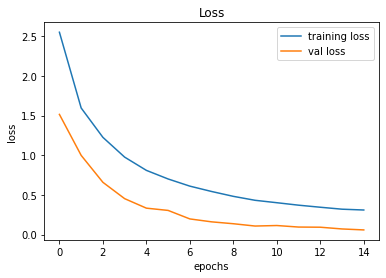

In [11]:
# plotting graphs for accuracy 

plt.figure(0)
plt.plot(lenet.history['accuracy'], label='training accuracy')
plt.plot(lenet.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(lenet.history['loss'], label='training loss')
plt.plot(lenet.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
# imgs = test["Path"].values

data =[]

for j in os.listdir(test_path):
        
            image = Image.open(test_path + '/' + j)
            image = image.resize((IMG_HEIGHT,IMG_WIDTH))
            image = np.array(image)
            data.append(image)

X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1) # model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  93.63420427553444
